# Importer les bibliothèques


In [8]:
# Importation des modules
import pandas as pd  #  pour la manipulation et l'analyse de données
import numpy as np  # pour le calcul scientifique avec Python
import nltk  #  pour le traitement du langage naturel
import re  #  pour les expressions régulières en Python
from nltk.corpus import stopwords   #"the", "is", "and", etc.


# Chargement de dataset


In [9]:
data=pd.read_csv("spam.csv", encoding="latin-1") # Charge le fichier CSV "spam.csv"

In [10]:
data.shape # Affiche les dimensions du DataFrame

(5572, 5)

In [11]:
data.head() # Affiche les premières lignes du DataFrame

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN



# Suppression des colonnes sans nom de DataFrame

In [12]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [13]:
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Explorer dataset


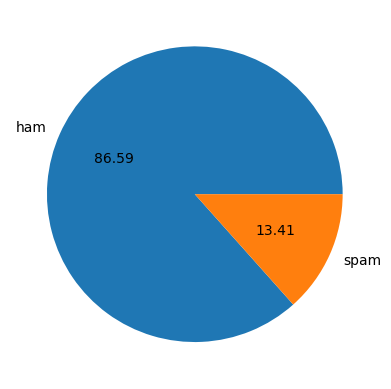

In [15]:
import matplotlib.pyplot as plt
plt.pie(data['class'].value_counts() , labels = ['ham', 'spam'] ,autopct = '%0.2f') 
plt.show() # Affiche le diagramme généré

# Conversion de la colonne « classe » en valeurs binaires

In [16]:
data['class']=data['class'].map({'ham':0, 'spam':1}) #mapper les valeurs de la colonne "class" aux valeurs binaires

In [17]:
data.head()

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Prétraitement de dataset

In [41]:
from sklearn.feature_extraction.text import CountVectorizer #permettra de convertir le texte en vecteurs de compte pour l'analyse

In [42]:
from sklearn.model_selection import train_test_split #pour diviser les données en ensembles d'entraînement et de test

In [36]:
X=data['message']
y=data['class']

In [37]:
X.shape

(5572,)

In [38]:
y.shape

(5572,)

In [39]:
data.isnull().sum()

class      0
message    0
dtype: int64

# Application de CountVectorizer pour transformer les données


In [43]:
cv=CountVectorizer() # Initialise un objet CountVectorizer.

In [44]:
X=cv.fit_transform(X)# Transforme les données textuelles (X)

In [45]:
# Divise les données transformées en ensembles d'entraînement et de test
x_train, x_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [46]:
x_train.shape

(4457, 8672)

In [47]:
x_test.shape

(1115, 8672)

In [48]:
#Importe les modèles de classification
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [49]:
# Instanciation des modèles de classification
modelNavies_Bais=MultinomialNB()
modelLogistique=LogisticRegression()
modelmlp = MLPClassifier()

# Entraînement des modèles sur les données d'entraînement


In [50]:
modelNavies_Bais.fit(x_train, y_train)
modelLogistique.fit(x_train, y_train)
modelmlp.fit(x_train, y_train)

MLPClassifier()

# Scores d'évaluation du modèle sur les données de test


In [51]:
print("Naives Bayes:",modelNavies_Bais.score(x_test, y_test))
print("LogistiqueRegression",modelLogistique.score(x_test, y_test))
print("MlpClassifier",modelmlp.score(x_test, y_test))

Naives Bayes: 0.97847533632287
LogistiqueRegression 0.97847533632287
MlpClassifier 0.9802690582959641


# Sauvegarde des modèles entraînés dans des fichiers Pickle


In [52]:
import pickle #permet de sérialiser et de désérialiser des objets Python.

In [53]:
# Sérialise et sauvegarde les modèle en mode écriture binaire
pickle.dump(modelNavies_Bais, open('NaivesBaies.pkl','wb'))
pickle.dump(modelLogistique, open('Logistique.pkl','wb'))
pickle.dump(modelmlp, open('modelmlp.pkl','wb'))
pickle.dump(cv, open('Models/vectorizer.pkl','wb'))
